# Noise Removel from Images

Here we'll build a system that removes noise from images. It will take as input a noisy digit image, and it will output a clean digit image, represented as an array of pixel intensities, just like the MNIST images.

Notice that the classifier’s output is multilabel (one label per pixel) and each label can have multiple values (pixel intensity ranges from 0 to 255). It is thus an example of a multioutput classification system.

In [17]:
# Importing required librarys
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [6]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml('mnist_784', version=1, cache=True)

mnist.target = mnist.target.astype(np.int8)
sort_by_target(mnist)

X, y = mnist["data"], mnist["target"]
X.shape
y.shape

(70000,)

In [21]:
#Selecting one any image and reshaping it to 28*28 pixel
some_digit=X[35000]
some_digit_image=some_digit.reshape(28,28)

<function matplotlib.pyplot.show(*args, **kw)>

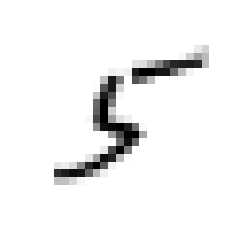

In [27]:
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show

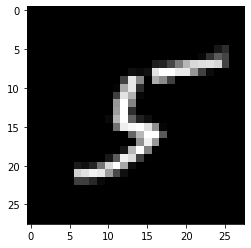

In [28]:
plt.imshow(120-some_digit_image,cmap=matplotlib.cm.binary, interpolation='nearest')


In [29]:
some_digit_image.shape

(28, 28)

In [30]:
X[35000].shape

(784,)

In [33]:
y[35000]
y.shape

(70000,)

In [35]:
#Split the data into Train and Test
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

In [36]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [37]:
#Also we need to shuffle our training data so that it ensures that we don't miss out any digit in a 
#cross validation fold.
np.random.seed(42)
shuffle_index=np.random.permutation(60000)
X_train,y_train=X_train[shuffle_index],y_train[shuffle_index]

In [40]:
#We are trimming X and Y because KNN take a lot of time to process
X_train,X_test,y_train,y_test=X[:30000],X[:5000],y[:30000],y[:5000]

In [41]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(30000, 784)
(5000, 784)
(30000,)
(5000,)


In [45]:
#Creating noisee image
import numpy.random as rnd
noise_train = rnd.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise_train
noise_test = rnd.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise_test
y_train_mod = X_train
y_test_mod = X_test

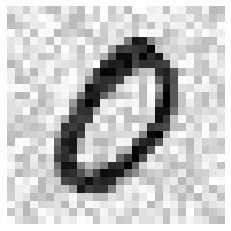

In [46]:
#View Noisy Image
def plot_digit(array):
    array_image=array.reshape(28,28)
    plt.imshow(array_image,cmap=matplotlib.cm.binary, interpolation='nearest')
    plt.axis('off')
    plt.show
plot_digit(X_test_mod[4000])
plot_digit(X_train_mod[4000])

In [47]:
#Cleaninibng Image with the help of KNN
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()

In [48]:
knn_clf.fit(X_train_mod,y_train_mod)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [50]:
clean_digit = knn_clf.predict([X_test_mod[4000]])

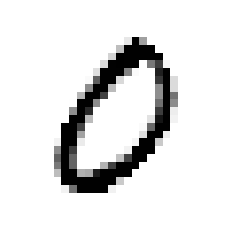

In [51]:
plot_digit(clean_digit)